<a href="https://colab.research.google.com/github/BLRGoD/Econometrics_labs/blob/main/Econometrics_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2
Гетероскедастичность (непостоянство дисперсий регрессионных остатков) часто возникает в случае «неоднородности» объектов наблюдения. 

В ходе лабораторной работы необходимо:
1. построить МНК-оценки коэффициентов линейной модели множественной регрессии;
2. исследовать регрессионные остатки на гетероскедастичность, используя тесты Спирмена, Голдфелда-Квандта, Глейзера;
3. если возможно построить ОМНК-оценки параметров регрессионной модели;
4. исследовать линейную модели множественной регрессии с помощью несмещенных оценок ковариационной матрицы вектора оценок.

Подключение библиотек:

In [ ]:
import xlrd 
import numpy as np
import pandas as pd
import pylab
import statsmodels.regression.linear_model as s
import scipy, scipy.stats
from statsmodels.stats.api import het_goldfeldquandt
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from numpy import arange
from scipy.stats import f
from statsmodels.compat import lzip

Выгрузка данных:

In [ ]:
"""
Excel-файл должен содержать первый столбец Y и остальные столбцы X.  
Заголовков у столбцов, как и названия объектов, быть не должно (только только цифры)
ОБЯЗАТЕЛЬНО РАСШИРЕНИЕ У ФАЙЛА xls
"""

data = xlrd.open_workbook('lab_2.xls') #УКАЗАТЬ ПУТЬ К ФАЙЛУ
sheet = data.sheet_by_index(0) 
vals = [sheet.row_values(rownum) for rownum in range(sheet.nrows)] 
vals = np.array(vals) 
Y = np.copy(vals[:,:1]) 
X = np.copy(vals[:,1:]) 
n, k = X.shape 
X = np.hstack([np.ones((X.shape[0], 1)), X]) 


Построение регрессионной модели по переменным, оставшимся после устранения мультколлинеарности:

In [ ]:
OLS_model = s.OLS(Y,X).fit() 
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     11.89
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.49e-06
Time:                        16:52:48   Log-Likelihood:                -190.41
No. Observations:                  87   AIC:                             388.8
Df Residuals:                      83   BIC:                             398.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.1911      1.276     53.456      0.000      65.654      70.728
x1             0.1362      0.045      3.017      0.003       0.046       0.226
x2            -0.0121      0.006     -2.098      0.039      -0.024      -0.001
x3            -0.3200      0.088     -3.627      0.000      -0.496      -0.145
==============================================================================
Omnibus:                       45.626   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.860
Skew:                           1.609   Prob(JB):                     4.38e-41
Kurtosis:                       9.396   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Вычисление регрессионных остатков:

In [ ]:
E = OLS_model.resid 

Построим гистограмму распределения регрессионных остатков и проверим гипотезу об их нормальном распределении:

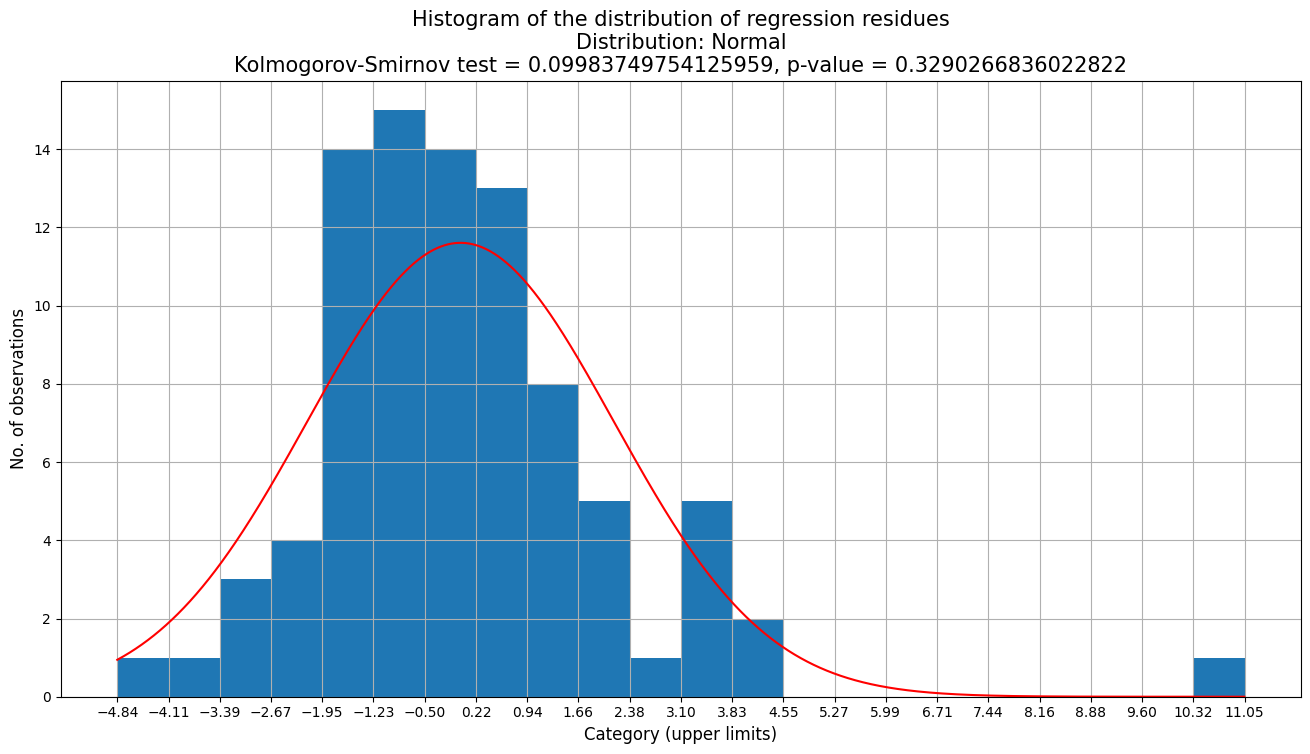

In [ ]:
plt.figure(figsize=(16, 8))
histData = plt.hist(E, bins=22)
range_ = arange(min(E), max(E), 0.005)
coefY = len(E) * (histData[1][1] - histData[1][0])
plt.plot(range_,
         [norm(E.mean(),E.std()).pdf(x) * coefY for x in range_],
         color='r')
plt.xticks(histData[1])
KS_maxD, KS_PValue = kstest(E, cdf='norm', args=(E.mean(), E.std()))
plt.title("Histogram of the distribution of regression residues\n" +
          "Distribution: Normal\n" +
          f"Kolmogorov-Smirnov test = {KS_maxD}, p-value = {KS_PValue}", fontsize=15)
plt.ylabel("No. of observations", fontsize=12)
plt.xlabel("Category (upper limits)", fontsize=12)
plt.grid() 
plt.show() 

<h4>Анализ графиков остатков</h4>

y = 0.005061x + (1.321168)
y = -0.008579x + (1.907691)
y = -0.020203x + (2.407532)


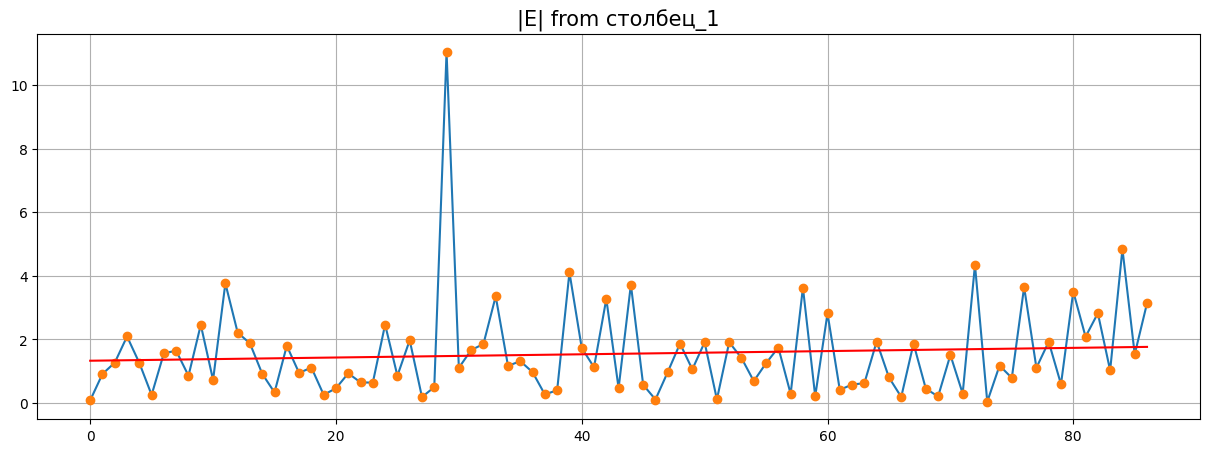

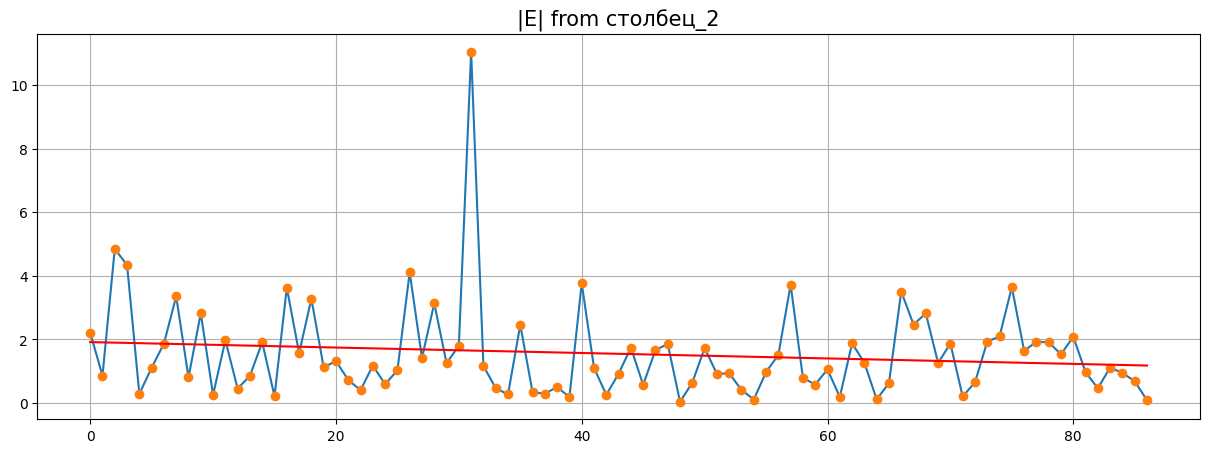

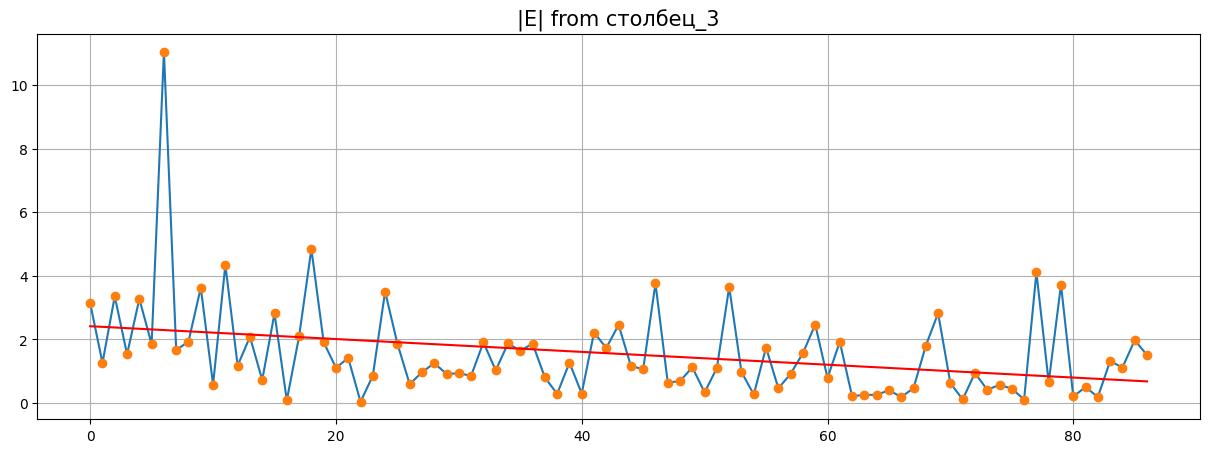

In [ ]:
#Сортировка и график модулей остатков с трендами
maxz = 0
for var in range(1, k+1):
    Xsort = np.copy(X[:, var]) 
    Epl = abs(E[Xsort.argsort()]) 
    plt.figure(figsize=(15, 5)) 
    plt.grid() 
    plt.title(f"|E| from столбец_{var}", fontsize=15)
    plt.plot(Epl) 
    Xgraph = [i for i in range(87)] 
    pylab.plot(Xgraph, Epl, 'o') 
    z = np.polyfit(Xgraph, Epl, 1) 
    p = np.poly1d(z) 
    pylab.plot(Xgraph,p(Xgraph), "r-") 
    print (f"y = {z[0]:6f}x + ({z[1]:6f})") 
    if abs(z[0]) > maxz:
      maxz = z[0]; #определение наибольшего наклона по всем уравнениям тренда
      maxk = var; #номер столбца, по которому дальше исследуем

In [ ]:
print(f"Далее исследоваться гетероскедастичность будет по столбцу {maxk}")

Далее исследоваться гетероскедастичность будет по столбцу 3


<h4>Тест ранговой корреляции Спирмена</h4>


In [ ]:
maxk = 1
if maxk == 1:
  X_investigated = X[:,1]
else:
  X_investigated = X[:,maxk:maxk+1]

rho, pval = scipy.stats.spearmanr(E, X_investigated)

print(scipy.stats.spearmanr(E, X_investigated) )
if pval < 0.05 :
  Spearman = 1; #есть гетеро
  print("Поскольку p-value < 0.05, то гипотеза об отсутствии гетероскедастичности отклоняется.")
else: 
  print("Поскольку p-value > 0.05, то гипотеза об отсутствии гетероскедастичности принимается.")
  Spearman = 0

SignificanceResult(statistic=0.018164667083043585, pvalue=0.8673764050896857)
Поскольку p-value > 0.05, то гипотеза об отсутствии гетероскедастичности принимается.


<h4>Тест Голдфелда-Квандта</h4>

In [ ]:
def het_gq(y, x):
    nobs, nvar = x.shape
    sizeSubsample = round(3 * nobs / 8)
    fval, _, _ = het_goldfeldquandt(y=y, x=x, idx=1, split=sizeSubsample, drop=nobs - 2 * sizeSubsample)
    if fval < 1.0:
      fval = 1.0 / fval
      GK = 0 #обратная пропорциональность
    else: 
      GK = 1 #прямая пропорциальность
    return (fval, f.ppf(q=0.95, dfn=sizeSubsample - nvar, dfd=sizeSubsample - nvar), GK)

In [ ]:
name = ['F statistic', 'F crit']
GK_Fstat, GK_Fcrit, GK = het_gq(y=Y, x=X[:,[0,maxk]]) # для вычисления сигма-матрицы
print(lzip(name, [GK_Fstat, GK_Fcrit]) )
if GK_Fstat > GK_Fcrit :
  print("Т.к. Fнабл > Fкрит, то гипотеза об отсутствии гетероскедастичности отклоняется.")
  Test_GK = 1 #есть гетеро
else:
  Test_GK = 0 #нет гетеро
  print("Т.к. Fнабл < Fкрит, то гипотеза об отсутствии гетероскедастичности принимается.")

  #het_gq(y=Y, x=X[:,[0,maxk]])

[('F statistic', 1.2164631067933083), ('F crit', 1.8221322904974944)]
Т.к. Fнабл < Fкрит, то гипотеза об отсутствии гетероскедастичности принимается.


<h4>Тест Глейзера</h4>

Матрица для возведенных X в степень гамма, где гамма изменяется от -3 до 3 с шагом 0.5

In [ ]:
Xgm = np.zeros((n,13))   # это матрица со столбцом из 1 и Х в различных степенях
gamma = -3
for j in range(0, 13):
    for i in range(0, n):
        Xgm[i][j] = abs(X[i][maxk])**gamma
    gamma = gamma + 0.5
Xgm = np.hstack([np.ones((Xgm.shape[0], 1)), Xgm])
Xgmd = pd.DataFrame(data=Xgm)
Xgmd   # матрица Xgm в форме DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.125000,0.176777,0.250000,0.353553,0.500000,0.707107,1.0,1.414214,2.0,2.828427,4.00,5.656854,8.000
1,1.0,0.012578,0.026081,0.054083,0.112149,0.232558,0.482243,1.0,2.073644,4.3,8.916670,18.49,38.341680,79.507
2,1.0,0.001467,0.004353,0.012913,0.038307,0.113636,0.337100,1.0,2.966479,8.8,26.105019,77.44,229.724164,681.472
3,1.0,0.014509,0.029379,0.059488,0.120455,0.243902,0.493865,1.0,2.024846,4.1,8.301867,16.81,34.037656,68.921
4,1.0,0.004196,0.010448,0.026015,0.064776,0.161290,0.401610,1.0,2.489980,6.2,15.437876,38.44,95.714828,238.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1.0,0.000129,0.000573,0.002551,0.011350,0.050505,0.224733,1.0,4.449719,19.8,88.104438,392.04,1744.467873,7762.392
83,1.0,0.005694,0.013475,0.031888,0.075460,0.178571,0.422577,1.0,2.366432,5.6,13.252019,31.36,74.211305,175.616
84,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.00,1.000000,1.000
85,1.0,0.045554,0.076226,0.127551,0.213434,0.357143,0.597614,1.0,1.673320,2.8,4.685296,7.84,13.118829,21.952


Строим уравнения регрессии для всех возведенных X в степень гамма:

In [ ]:
Rsqrd = np.zeros((13,6))
u = 0
gamma = -3
for i in range(1,14):
    Rsqrd[u][0] = gamma
    result = s.OLS(abs(E), Xgm[:, [0, i]]).fit()
    Rsqrd[u][1] = result.params[0]
    Rsqrd[u][2] = result.params[1]
    Rsqrd[u][3] = result.fvalue
    Rsqrd[u][4] = result.f_pvalue
    Rsqrd[u][5] = result.rsquared
    u += 1 # u нужно для того, чтобы идти по строкам при составлении таблицы в отчете
    gamma += 0.5    

d = {"gamma": Rsqrd[::,0], "b0": Rsqrd[::,1], "b1": Rsqrd[::,2], "F-stat": Rsqrd[::,3], "p-value": Rsqrd[::,4], "R^2": Rsqrd[::,5]}
df = pd.DataFrame(data=d)
df


,gamma,b0,b1,F-stat,p-value,R^2
0,-3.0,1.585266,-1.108385,1.086469,0.300210,0.012621
1,-2.5,1.597212,-1.096912,1.104165,0.296332,0.012824
2,-2.0,1.618722,-1.073905,1.123355,0.292200,0.013044
3,-1.5,1.661063,-1.044349,1.155826,0.285375,0.013416
4,-1.0,1.757666,-1.041732,1.235339,0.269505,0.014325
5,-0.5,2.069950,-1.233740,1.419317,0.236832,0.016424
6,0.0,0.769402,0.769402,NaN,NaN,0.000000
7,0.5,0.834717,0.269620,2.214769,0.140396,0.025394
8,1.0,1.168681,0.048568,2.708106,0.103533,0.030876
9,1.5,1.288519,0.010132,3.138004,0.080072,0.035603


Выясняем значимость построенных уравнений:

In [ ]:
Fcr = f.ppf(q = 1 - 0.05, dfn = 1, dfd = 85 - 1 - 1)
print("Fcrit = ", Fcr )
umax = 0
Gleyser = 0;
for u in range(0, 13): # цикл для выявления значимости уравнения
    if Rsqrd[u][3] > Fcr:
        print("Уравнение с гамма = ", Rsqrd[u][0], "значимо")
        Gleyser = 1; #значит, что Глейзер выполнился
    else: print("Уравнение с гамма = ", Rsqrd[u][0], "не значимо")

Fcrit =  3.9559610071544236
Уравнение с гамма =  -3.0 не значимо
Уравнение с гамма =  -2.5 не значимо
Уравнение с гамма =  -2.0 не значимо
Уравнение с гамма =  -1.5 не значимо
Уравнение с гамма =  -1.0 не значимо
Уравнение с гамма =  -0.5 не значимо
Уравнение с гамма =  0.0 не значимо
Уравнение с гамма =  0.5 не значимо
Уравнение с гамма =  1.0 не значимо
Уравнение с гамма =  1.5 не значимо
Уравнение с гамма =  2.0 не значимо
Уравнение с гамма =  2.5 не значимо
Уравнение с гамма =  3.0 не значимо


Выбираем уравнение с наибольшим R^2:

In [ ]:
Rmax = 0
umax = 0
for u in range(0, 13): # цикл для выявления максимального R^2
    if Rsqrd[u][5] > Rmax:
        Rmax = Rsqrd[u][5]
        umax = u
d = {"gamma": Rsqrd[umax][0], "b0": Rsqrd[umax][1], "b1": Rsqrd[umax][2], "F-stat": Rsqrd[umax][3], "p-value": Rsqrd[umax][4], "R^2": Rsqrd[umax][5]}
df = pd.DataFrame(data=d, index = [0])
df

,gamma,b0,b1,F-stat,p-value,R^2
0,3.0,1.411039,0.000091,3.700323,0.057749,0.041717


<h4>СИГМА_МАТРИЦА:</h4>

Далее выбираете один из тестов, по которому будете строить сигма-матрицу

<h4>Для теста Спирмена:</h4>

In [ ]:
"""
Выбираете тест, по которому строите сигма-матрицу и по которому впоследствии строим конечное уравнение регрессии
"""
Sigm = np.zeros((n,n)) # матрица n x n, заполненная нулями

if Spearman == 1: 
    if (rho > 0): 
        for i in range(0, n): 
            for j in range(0, n): 
                if i==j : 
                    Sigm[i][j]= (X[i][maxk])**2 
    elif (rho < 0): 
        for i in range(0, n): 
            for j in range(0, n): 
                if i==j : 
                    Sigm[i][j]= 1/((X[i][maxk])**2) 
else: print("Нет гетероскедастичности")
        
Sigmd = pd.DataFrame(data=Sigm)
Sigmd

Нет гетероскедастичности


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4>Для теста Голдфельда-Квандта:</h4>

In [ ]:
Sigm = np.zeros((n,n)) # матрица n x n, заполненная нулями


for i in range(0, n): 
   for j in range(0, n): 
       if i==j : 
            Sigm[i][j]= (X[i][maxk])**2 


Sigmd = pd.DataFrame(data=Sigm)
Sigmd

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,4.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
1,0.0,18.49,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
2,0.0,0.00,77.44,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
3,0.0,0.00,0.00,16.81,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
4,0.0,0.00,0.00,0.00,38.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,392.04,0.00,0.0,0.00,0.00
83,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,31.36,0.0,0.00,0.00
84,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.00,0.00
85,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,7.84,0.00


<h4>Для теста Глейзера:</h4>

In [ ]:
Sigm = np.zeros((n,n)) # матрица n x n, заполненная нулями

if Gleyser == 1 :
    for i in range(0, n): 
        for j in range(0, n): 
            if i==j : 
                Sigm[i][j]= (Rsqrd[umax][1] + Rsqrd[umax][2]*abs(X[i][maxk])**Rsqrd[umax][0])**2 
else: print("Нет гетероскедастичности")

Sigmd = pd.DataFrame(data=Sigm)
Sigmd

Нет гетероскедастичности


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Вычисляем Вомнк путем последовательных матричных операций, стандартные ошибки коэффициентов и стандартную ошибку уравнения регрессии:

87

In [ ]:
"""
По последней посчитанной сигма-матрице вычисляются коэффициенты уравнения регрессии
"""
Xt = X.T #транспонированная матрица Х
Sigm_inv = np.linalg.inv(Sigm) #обратная к сигма-матрице
XtSinv = np.dot(Xt,Sigm_inv) #их произведение,
XtSinvY = np.dot(XtSinv,Y) #домноженное на Y
XtSinvXinv = np.linalg.inv(np.dot(XtSinv, X))#обратная к произведению
Bomnk = np.dot(XtSinvXinv, XtSinvY)

S = ((Y-X.dot(Bomnk)).T.dot(Sigm_inv).dot(Y-X.dot(Bomnk)))*(1/(n-k-1)) #матрица стандартных ошибок
Eb = S*np.linalg.inv(np.dot(X.T,Sigm_inv).dot(X)) #ковариационная матрица для bомнк

d = {"coef": [i for i in range(k + 1)], "value": Bomnk[:,0], "Std": np.sqrt(np.diagonal(Eb))}
df = pd.DataFrame(data=d)
print('Стандартная ошибка:', *S)
df

Стандартная ошибка: [0.20966248]


,coef,value,Std
0,0,68.430727,0.962955
1,1,0.138136,0.082659
2,2,-0.012085,0.001521
3,3,-0.342467,0.077632
